In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
avocados = pd.read_csv('datasets/avocado.csv')
avocados.head

<bound method NDFrame.head of             date          type  year  avg_price         size     nb_sold
0     2015-12-27  conventional  2015       0.95        small  9626901.09
1     2015-12-20  conventional  2015       0.98        small  8710021.76
2     2015-12-13  conventional  2015       0.93        small  9855053.66
3     2015-12-06  conventional  2015       0.89        small  9405464.36
4     2015-11-29  conventional  2015       0.99        small  8094803.56
...          ...           ...   ...        ...          ...         ...
1009  2018-02-04       organic  2018       1.53  extra_large     1703.52
1010  2018-01-28       organic  2018       1.61  extra_large     1270.61
1011  2018-01-21       organic  2018       1.63  extra_large     1490.02
1012  2018-01-14       organic  2018       1.59  extra_large     1580.01
1013  2018-01-07       organic  2018       1.51  extra_large     1289.07

[1014 rows x 6 columns]>

In [3]:
nb_sold_by_size = avocados.groupby("size")["nb_sold"].sum()
nb_sold_by_size

size
extra_large    1.561752e+08
large          2.015012e+09
small          2.054936e+09
Name: nb_sold, dtype: float64

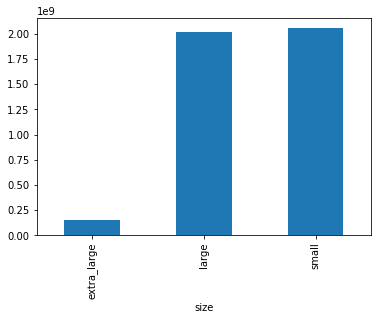

In [4]:
nb_sold_by_size.plot(kind='bar')
plt.show()

In [5]:
nb_sold_by_date = avocados.groupby("date")["nb_sold"].sum()
nb_sold_by_date

date
2015-01-04    27279606.03
2015-01-11    25081927.33
2015-01-18    24961540.48
2015-01-25    24094678.66
2015-02-01    39838734.08
                 ...     
2018-02-25    25434002.74
2018-03-04    26834303.05
2018-03-11    26094044.41
2018-03-18    26030618.97
2018-03-25    27480242.92
Name: nb_sold, Length: 169, dtype: float64

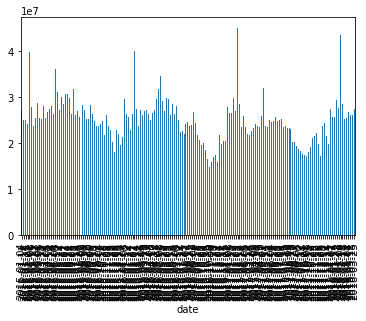

In [6]:
nb_sold_by_date.plot(kind='bar')
plt.show()

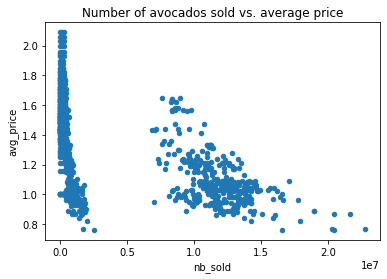

In [7]:
avocados.plot(x='nb_sold', y='avg_price', kind='scatter', title='Number of avocados sold vs. average price')
plt.show()

<AxesSubplot:>

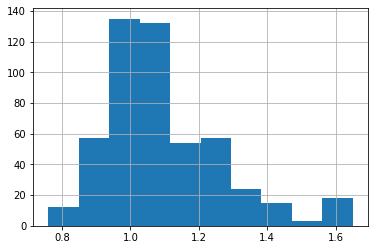

In [8]:
avocados[avocados['type'] == 'conventional']['avg_price'].hist()

<AxesSubplot:>

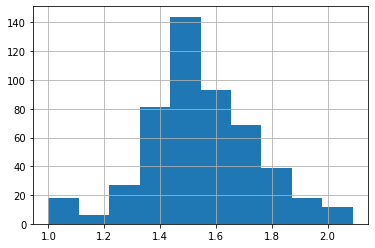

In [9]:
avocados[avocados['type'] == 'organic']['avg_price'].hist()

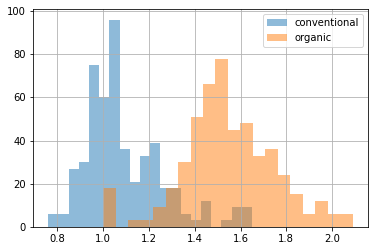

In [10]:
avocados[avocados['type'] == 'conventional']['avg_price'].hist(bins=20, alpha=0.5)
avocados[avocados['type'] == 'organic']['avg_price'].hist(bins=20, alpha=0.5)
plt.legend(["conventional", "organic"])
plt.show()

In [11]:
avocados['date'] = pd.to_datetime(avocados.date)
avocados['year'] = avocados['date'].dt.year
avocados_2016 = avocados.loc[avocados['year'] >= 2016]
avocados_2016

,date,type,year,avg_price,size,nb_sold
52,2016-12-25,conventional,2016,1.00,small,9255125.20
53,2016-12-18,conventional,2016,0.96,small,9394065.91
54,2016-12-11,conventional,2016,0.98,small,9009996.11
55,2016-12-04,conventional,2016,1.00,small,11043350.90
56,2016-11-27,conventional,2016,1.21,small,7891487.94
...,...,...,...,...,...,...
1009,2018-02-04,organic,2018,1.53,extra_large,1703.52
1010,2018-01-28,organic,2018,1.61,extra_large,1270.61
1011,2018-01-21,organic,2018,1.63,extra_large,1490.02
1012,2018-01-14,organic,2018,1.59,extra_large,1580.01


In [12]:
avocados_2016.isna().sum()

date         0
type         0
year         0
avg_price    0
size         0
nb_sold      0
dtype: int64

In [13]:
avocados_2016.isna().any()

date         False
type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool

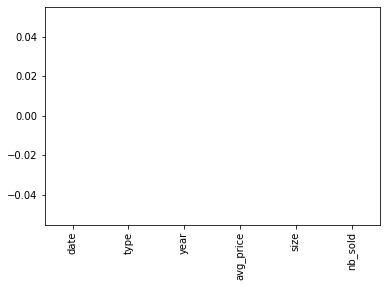

In [14]:
avocados_2016.isna().sum().plot(kind='bar')
plt.show()

In [15]:
avocados_complete = avocados_2016.dropna()

In [16]:
avocados_list = [
    {"date": "2019-11-03", "small_sold": 10376832, "large_sold": 7835071},
    {"date": "2019-11-10", "small_sold": 10717154, "large_sold": 8561348},
]
avocados_list

[{'date': '2019-11-03', 'small_sold': 10376832, 'large_sold': 7835071},
 {'date': '2019-11-10', 'small_sold': 10717154, 'large_sold': 8561348}]

In [17]:
avocados_2019 = pd.DataFrame(avocados_list)
avocados_2019

,date,small_sold,large_sold
0,2019-11-03,10376832,7835071
1,2019-11-10,10717154,8561348


In [18]:
avocados_dict = {
  "date": ["2019-11-17", "2019-12-01"],
  "small_sold": [10859987, 9291631],
  "large_sold": [7674135, 6238096]
}
avocados_dict

{'date': ['2019-11-17', '2019-12-01'],
 'small_sold': [10859987, 9291631],
 'large_sold': [7674135, 6238096]}

In [19]:
avocados_2019 = pd.DataFrame(avocados_dict)
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-17    10859987     7674135
1  2019-12-01     9291631     6238096
